# EPL EDA

In [ ]:
#http://www.football-data.co.uk/englandm.php(source)
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
epl1617 = "./EPL16:17.csv"
df1617 = pd.read_csv(epl1617)

In [7]:
df1617.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,13/8/16,Burnley,Swansea,0,1,A,0,0,D,...,3,9,10,14,7,4,3,2,0,0
1,E0,13/8/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,4,3,12,15,3,6,2,2,0,0
2,E0,13/8/16,Everton,Tottenham,1,1,D,1,0,H,...,6,4,10,14,5,6,0,0,0,0
3,E0,13/8/16,Hull,Leicester,2,1,H,1,0,H,...,5,5,8,17,5,3,2,2,0,0
4,E0,13/8/16,Man City,Sunderland,2,1,H,1,0,H,...,4,3,11,14,9,6,1,2,0,0


### Sorting out of winners and losers

In [8]:
def win(row):
    if (row["FTR"] == "A"):
        return row["AwayTeam"]
    elif (row["FTR"] == "H"):
        return row["HomeTeam"]
    elif (row["FTR"] == "D"):
        return "None"
    

def lose(row):
    if (row["FTR"] == "A"):
        return row["HomeTeam"]
    elif (row["FTR"]  == "H"):
        return row["AwayTeam"]
    elif (row["FTR"]  == "D"):
        return "None"

df1617["Winner"] = df1617.apply(win, axis=1) 
df1617["Loser"] = df1617.apply(lose, axis=1)

In [9]:
df1617.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Winner', 'Loser'],
      dtype='object')

### Making of a new dataframe for referees and related features

In [10]:
ref1617 = df1617[['Date', 'HomeTeam', 'AwayTeam', "Referee", 'HY', 'AY', 'HR', 'AR','Winner','FTR']].copy()

In [11]:
data_dummies = pd.get_dummies(ref1617["FTR"])
print ("Features after One-Hot Encoding: \n", list(data_dummies.columns))
ref1617 = ref1617.join(data_dummies)

Features after One-Hot Encoding: 
 ['A', 'D', 'H']


In [12]:
ref1617.head()

,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,Winner,FTR,A,D,H
0,13/8/16,Burnley,Swansea,J Moss,3,2,0,0,Swansea,A,1,0,0
1,13/8/16,Crystal Palace,West Brom,C Pawson,2,2,0,0,West Brom,A,1,0,0
2,13/8/16,Everton,Tottenham,M Atkinson,0,0,0,0,None,D,0,1,0
3,13/8/16,Hull,Leicester,M Dean,2,2,0,0,Hull,H,0,0,1
4,13/8/16,Man City,Sunderland,R Madley,1,2,0,0,Man City,H,0,0,1


In [13]:
ref1617.groupby('Referee').sum()

,HY,AY,HR,AR,A,D,H
Referee,,,,,,,
A Marriner,49,48,0,2,12,6,10
A Taylor,55,64,4,0,11,4,15
C Kavanagh,2,2,0,0,1,0,0
C Pawson,43,51,1,3,8,4,12
G Scott,6,15,0,2,2,0,6
J Moss,57,62,3,0,16,5,9
K Friend,47,47,0,1,5,6,9
L Mason,31,36,2,1,1,5,13
L Probert,4,8,0,0,1,1,2


In [14]:
a

NameError: name 'a' is not defined

### number of matches officiated by referees

In [15]:
ref1617["Referee"].value_counts()

M Oliver         33
J Moss           30
R Madley         30
M Dean           30
A Taylor         30
A Marriner       28
M Atkinson       27
C Pawson         24
N Swarbrick      24
M Clattenburg    22
K Friend         20
L Mason          19
M Jones          18
R East           11
P Tierney        10
S Attwell        10
G Scott           8
L Probert         4
C Kavanagh        1
l Mason           1
Name: Referee, dtype: int64

In [16]:
### Sorting of referees by nu

In [19]:
vc = ref1617["Referee"].value_counts()
u  = [i not in set(vc[vc==1].index) for i in ref1617["Referee"]]
ref16172 = ref1617[u]

In [26]:
ref1617.head()

,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,Winner,FTR,A,D,H
0,13/8/16,Burnley,Swansea,J Moss,3,2,0,0,Swansea,A,1,0,0
1,13/8/16,Crystal Palace,West Brom,C Pawson,2,2,0,0,West Brom,A,1,0,0
2,13/8/16,Everton,Tottenham,M Atkinson,0,0,0,0,None,D,0,1,0
3,13/8/16,Hull,Leicester,M Dean,2,2,0,0,Hull,H,0,0,1
4,13/8/16,Man City,Sunderland,R Madley,1,2,0,0,Man City,H,0,0,1


### l Mason and C Kavanagh have only officiated one match, therefore they'll be removed as we wouldnt be able to observe a trend from them 

In [480]:
ref1617 = ref1617[ref1617.Referee != "l Mason"]
ref1617 = ref1617[ref1617.Referee != "C Kavanagh"]

### Yellow cards per referee

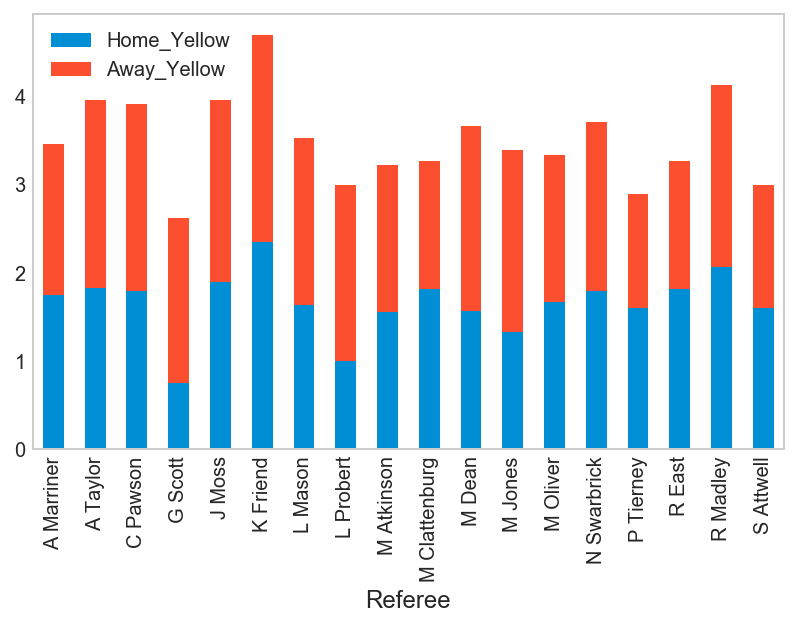

In [27]:
ref1617["Home_Yellow"] = ref1617["HY"]
ref1617["Away_Yellow"]  = ref1617["AY"] 
HomeYellow = ref1617.groupby("Referee").Home_Yellow.mean()
AwayaYellow = ref1617.groupby("Referee").Away_Yellow.mean()
Y = pd.concat([HomeYellow, AwayaYellow], axis=1)
Y.plot(kind='bar', stacked=True)
plt.grid(False)

### Red cards per referee

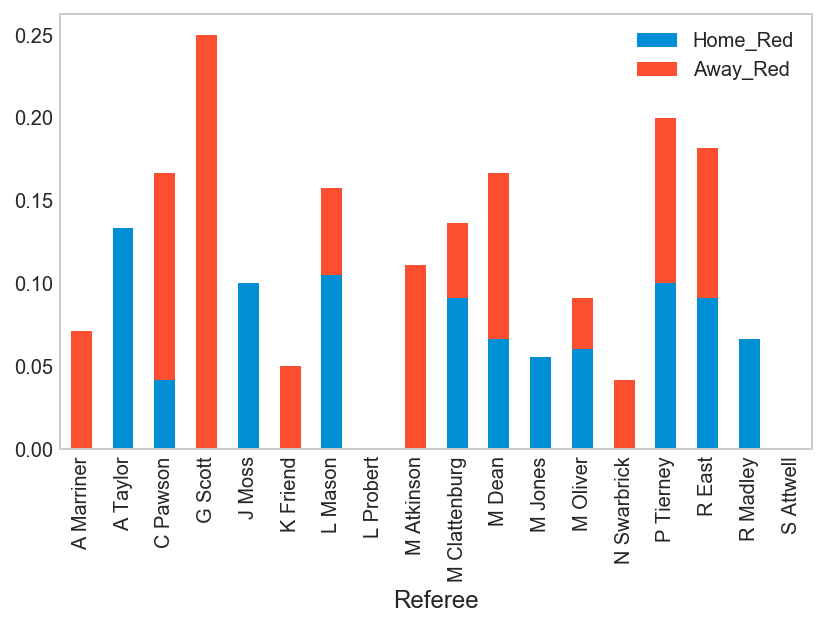

In [498]:
ref1617["Home_Red"] = ref1617["HR"]
ref1617["Away_Red"]  = ref1617["AR"]
HR = ref1617.groupby("Referee").Home_Red.mean()
AR = ref1617.groupby("Referee").Away_Red.mean()
R = pd.concat([HR, AR], axis=1)
R.plot(kind='bar', stacked=True)
plt.grid(False)

### Percentage of Home,Away Win and draw per referee

Text(0,0.5,'%')

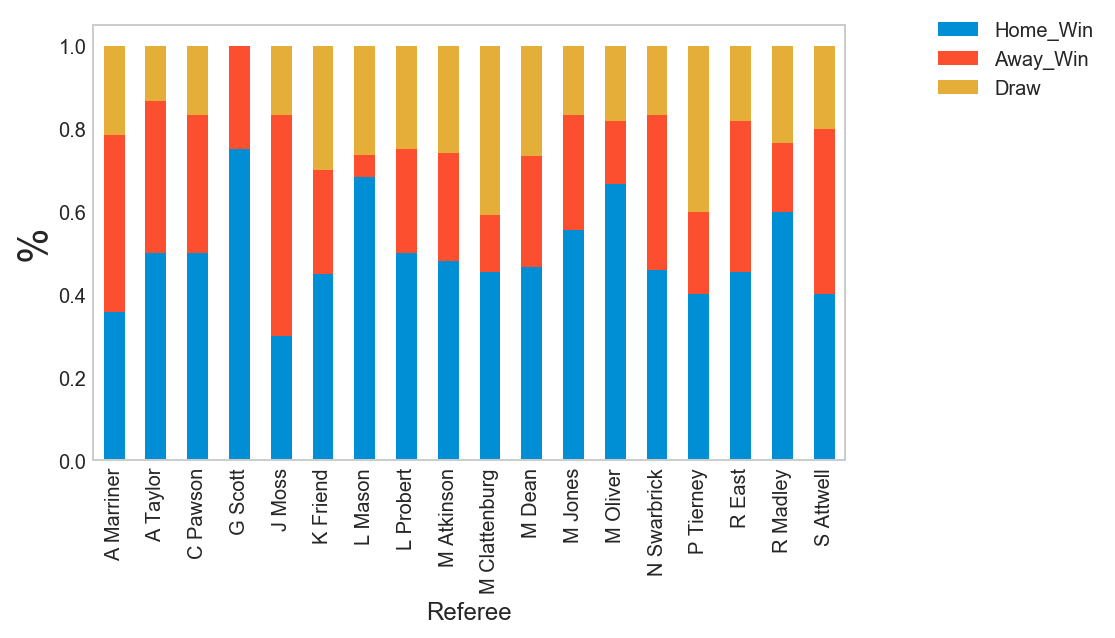

In [28]:
ref1617["Home_Win"] = ref1617["H"]
ref1617["Away_Win"]  = ref1617["A"]
ref1617["Draw"]  = ref1617["D"]
refhomewin = ref1617.groupby("Referee").Home_Win.mean()
refawaywin = ref1617.groupby("Referee").Away_Win.mean()
refdraw = ref1617.groupby("Referee").Draw.mean()
d = pd.concat([refhomewin, refawaywin, refdraw], axis=1)
plt.figure(figsize=(50,10))
d.plot(kind='bar', stacked=True)
plt.legend (prop = {"size":15})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(False)
plt.ylabel('%', fontsize=20)
# plt.legend((refhomewin[0], refawaywin[0], refdraw[0]), ('Home', 'Away', "Draw"))

### G scott seems to be bias to home teams 
##### ~ Has the highest mean of home wins 
##### ~ Gives the highest number of red cards to Away teams 
##### ~ Doesnt Give Red cards to Home team 
##### ~ Gives a much higher Percentage of Yellow cards to the Away team 
### John Moss is observed to be bias to Away teams
##### ~ Has the highest mean of Away wins 
##### ~ Gives the highest number of red cards to Home teams 
##### ~ Doesnt Give Red cards to Away team 

In [346]:
data_dummies = pd.get_dummies(df1617["FTR"])
print ("Features after One-Hot Encoding: \n", list(data_dummies.columns))
df1617 = df1617.join(data_dummies)

('Features after One-Hot Encoding: \n', ['A', 'D', 'H'])


## Clubs by win percentages 

In [456]:
HW = df1617.groupby("HomeTeam").H.mean()
HW = HW.reset_index()
HW=HW.rename(columns = {'H':"HomeWin_%"})
# HW=HW.sort_values(by='HomeWin_%', ascending=False)
# HW = HW.reset_index()
AW = df1617.groupby("AwayTeam").A.mean()
AW = AW.reset_index()
AW=AW.rename(columns = {'A':"AwayWin_%"})
# AW=AW.sort_values(by='AwayWin_%', ascending=False)
# AW = AW.reset_index()

In [348]:
HW.head()

,HomeTeam,HomeWin_%
0,Arsenal,0.736842
1,Bournemouth,0.473684
2,Burnley,0.526316
3,Chelsea,0.894737
4,Crystal Palace,0.315789


In [349]:
AW.head()

,AwayTeam,AwayWin_%
0,Arsenal,0.473684
1,Bournemouth,0.157895
2,Burnley,0.052632
3,Chelsea,0.684211
4,Crystal Palace,0.315789


### Concating home win and Away win percentages for plot

In [350]:
win = pd.concat([HW, AW], axis=1)
win = win.drop(["AwayTeam"], axis=1)
win =win.rename(columns = {'HomeTeam':"Team"})

In [301]:
win.head()

,Team,HomeWin_%,AwayWin_%
0,Arsenal,0.736842,0.473684
1,Bournemouth,0.473684,0.157895
2,Burnley,0.526316,0.052632
3,Chelsea,0.894737,0.684211
4,Crystal Palace,0.315789,0.315789


In [ ]:
### plotting of home wins vs Away win percentages

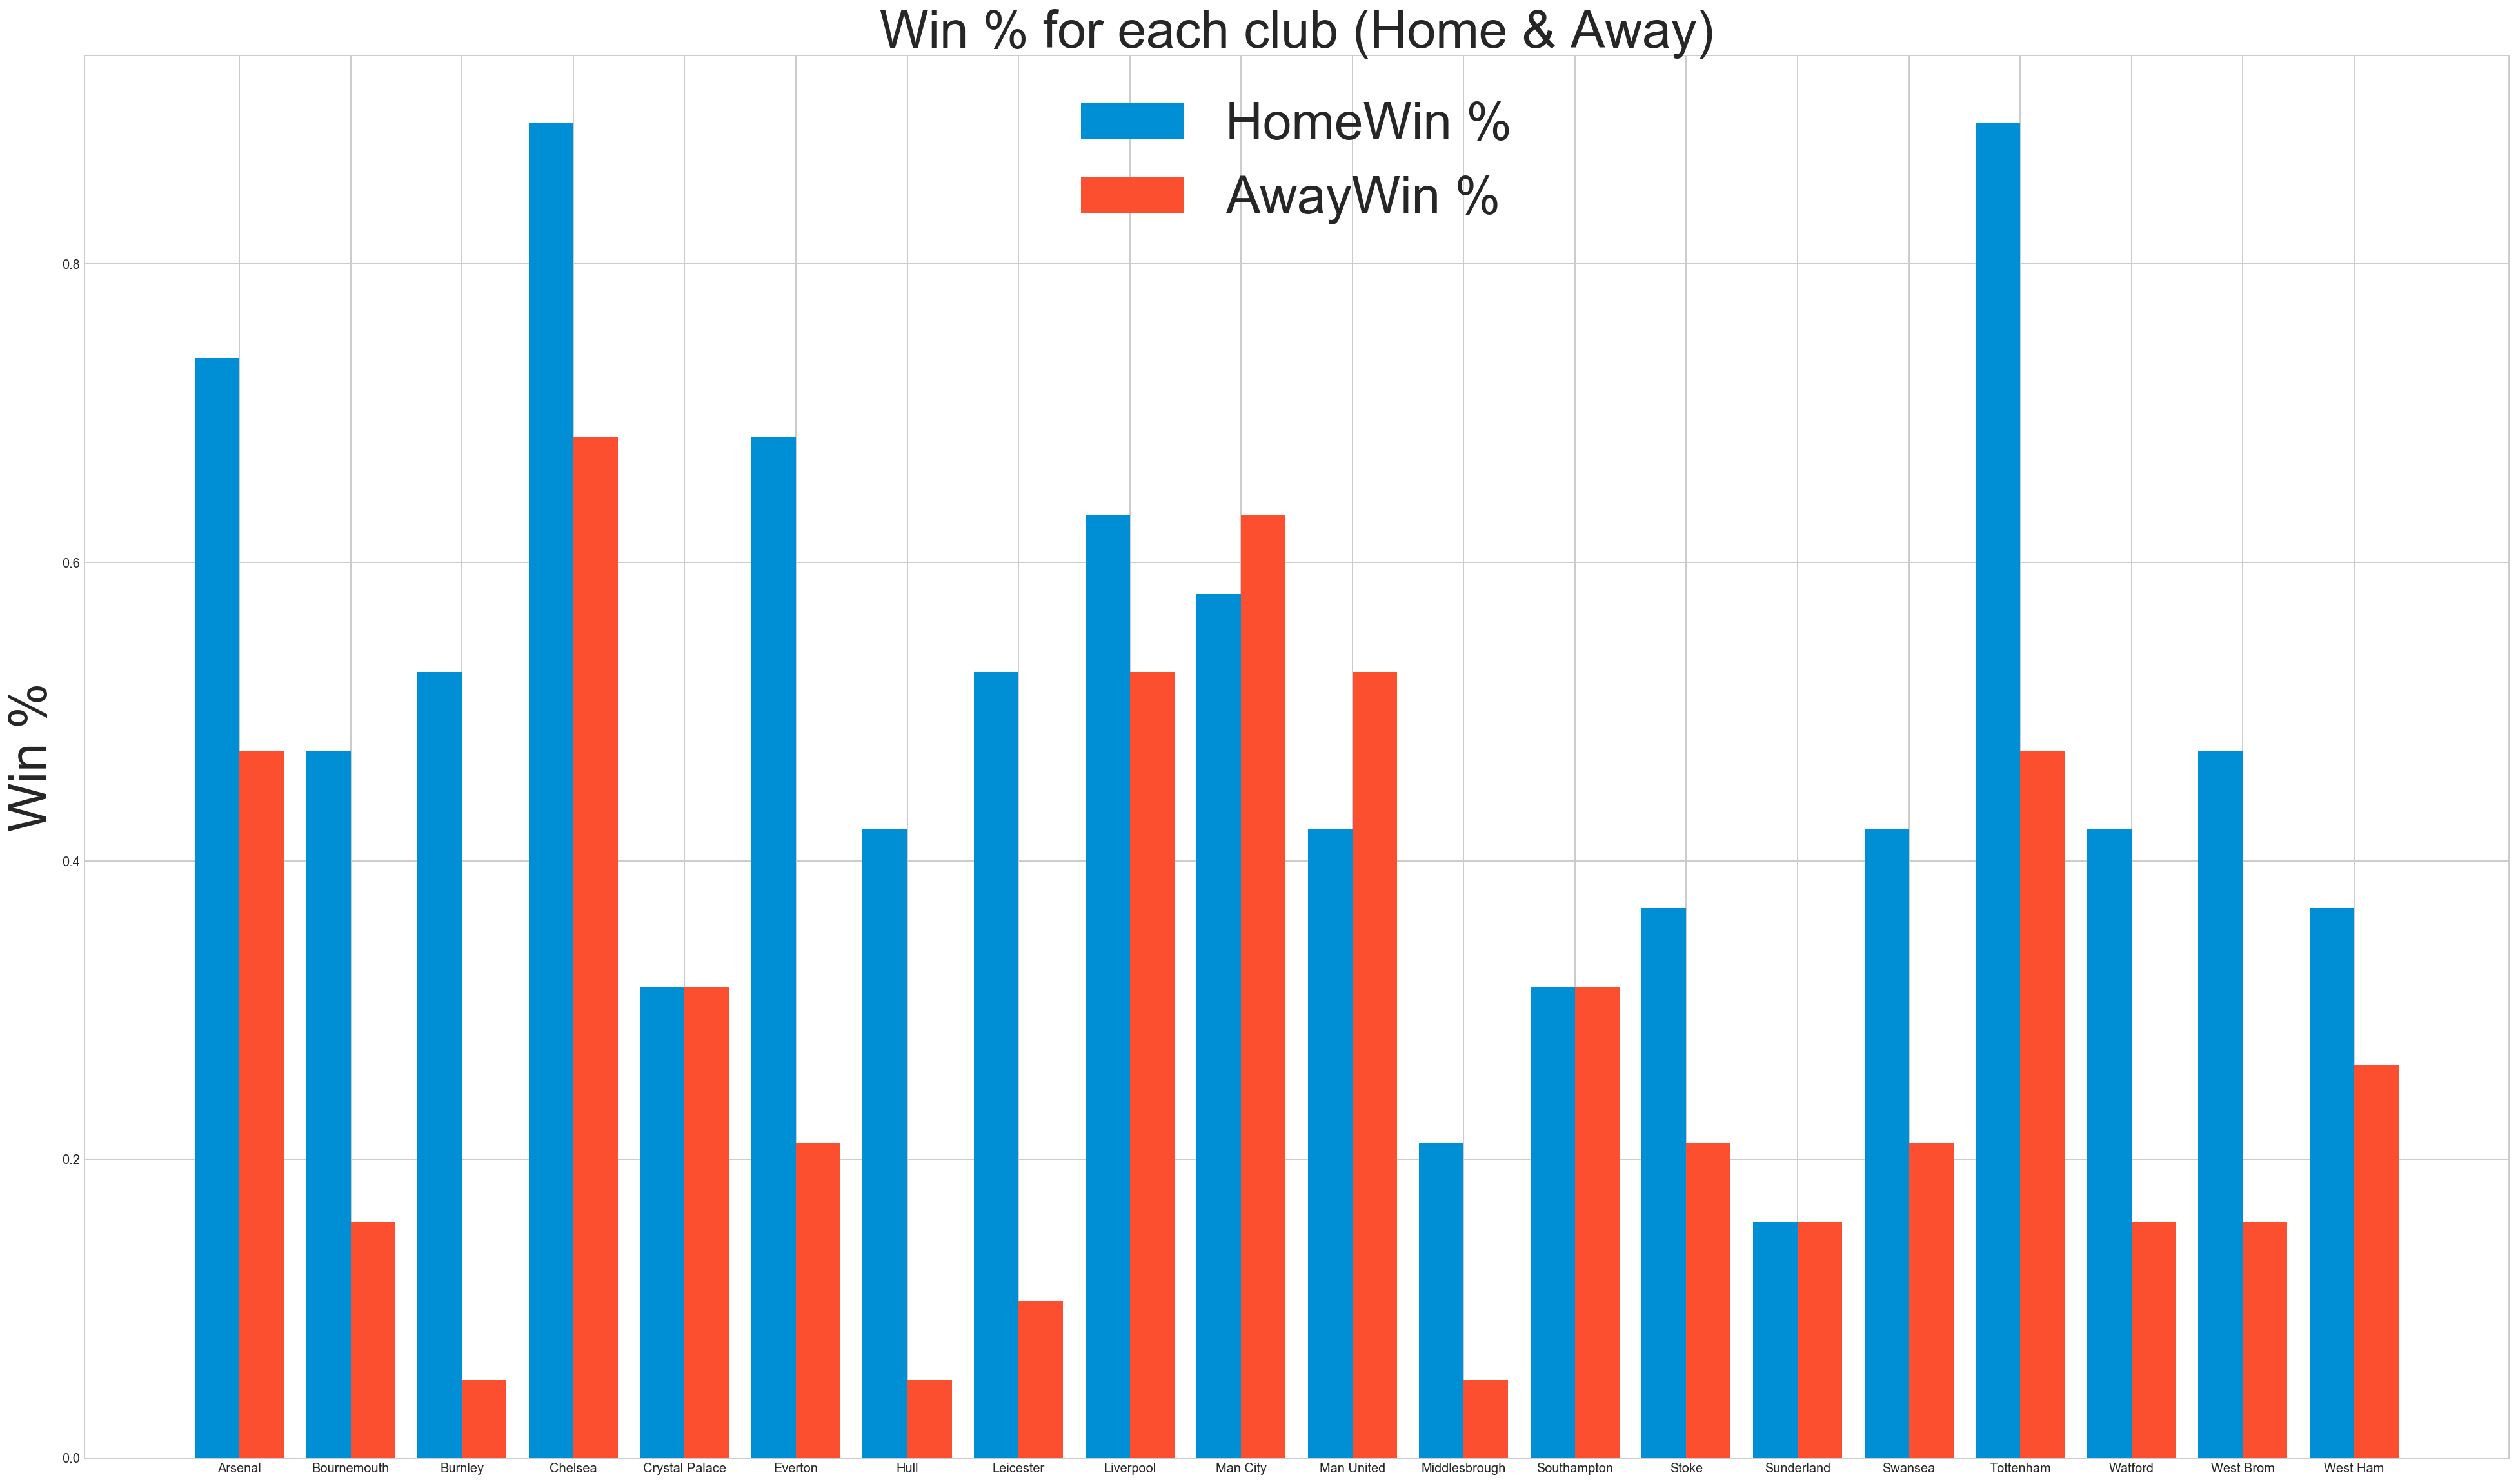

In [369]:
import numpy as np
plt.figure(figsize=(30,20))
N = 20
HomeWin_per = win["HomeWin_%"]
AwayWin_per = win["AwayWin_%"]

ind = np.arange(N) 
width = 0.4      
plt.bar(ind, HomeWin_per, width, label='Home Win %')
plt.bar(ind + width, AwayWin_per, width, label="Away Win %")

plt.ylabel('Win %', fontsize=40)
plt.title('Win % for each club (Home & Away)', fontsize=40)
plt.xticks(ind + width / 2, (win["Team"]))
plt.legend(loc='best', prop = {"size":40})
plt.show()

### General trend of a higher home win percentage compared to an away win percentage
### An Exception for Manchester united and Manchester City